In [62]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Tesis_MbaAis_v2.csv")
df

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tanggal                      5626 non-null   object 
 1   jam                          5626 non-null   object 
 2   tekanan_uap_masuk            5626 non-null   int64  
 3   tekanan_uap_bekas            5626 non-null   float64
 4   temp_uap_bekas               5626 non-null   int64  
 5   tekanan_oli                  5626 non-null   float64
 6   temp_cooling_water_keluar    5626 non-null   int64  
 7   voltase                      5626 non-null   int64  
 8   ampere                       5626 non-null   int64  
 9   cos_p                        5626 non-null   float64
 10  frekuensi                    5626 non-null   float64
 11  tekanan_uap_masuk_abnormal   0 non-null      float64
 12  tekanan_uap_bekas_abnormal   0 non-null      float64
 13  temp_uap_bekas_abn

In [123]:
import datetime
print(datetime.datetime.strptime('1/5/23 03:55', '%d/%m/%y %H:%M'))

2023-05-01 03:55:00


In [124]:
dt=[]
for i in range(len(df)):
    try:
        dt.append(datetime.datetime.strptime(df["tanggal"][i][:-4]+'23 ' + df["jam"][i], '%m/%d/%y %H:%M'))
    except:
        print(i)

In [125]:
df.insert(2, 'timestamps', dt)

In [126]:
df

,tanggal,jam,timestamps,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,...,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar.1,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance
0,1/4/2023,7:30,2023-01-04 07:30:00,19,3.0,135,3.3,48,380,800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1/4/2023,8:00,2023-01-04 08:00:00,19,3.0,135,3.3,48,380,800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1/4/2023,8:30,2023-01-04 08:30:00,19,3.0,135,3.3,48,380,800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1/4/2023,9:00,2023-01-04 09:00:00,16,2.0,130,3.3,38,380,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1/4/2023,9:30,2023-01-04 09:30:00,19,1.8,130,3.3,40,380,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,4/30/2023,5:00,2023-04-30 05:00:00,11,1.2,125,3.2,30,350,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5622,4/30/2023,5:30,2023-04-30 05:30:00,18,1.4,125,3.2,30,350,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5623,4/30/2023,6:00,2023-04-30 06:00:00,10,5.0,125,3.2,30,350,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5624,4/30/2023,6:30,2023-04-30 06:30:00,10,1.2,125,3.2,30,350,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [127]:
df.rename(columns={"temp_cooling_water_keluar.1":"temp_cooling_water_keluar_abnormal"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tanggal                             5626 non-null   object        
 1   jam                                 5626 non-null   object        
 2   timestamps                          5626 non-null   datetime64[ns]
 3   tekanan_uap_masuk                   5626 non-null   int64         
 4   tekanan_uap_bekas                   5626 non-null   float64       
 5   temp_uap_bekas                      5626 non-null   int64         
 6   tekanan_oli                         5626 non-null   float64       
 7   temp_cooling_water_keluar           5626 non-null   int64         
 8   voltase                             5626 non-null   int64         
 9   ampere                              5626 non-null   int64         
 10  cos_p                   

In [128]:
tum = []
tub = []
temub = []
to = []
tcwk = []
vol = []
amp = []
cp = []
freq = []

for i in range(len(df)):
    value_tum = df["tekanan_uap_masuk"][i]
    value_tub = df["tekanan_uap_bekas"][i]
    value_temub = df["temp_uap_bekas"][i]
    value_to = df["tekanan_oli"][i]
    value_tcwk = df["temp_cooling_water_keluar"][i]
    value_vol = df["voltase"][i]
    value_amp = df["ampere"][i]
    value_cp = df["cos_p"][i]
    value_freq = df["frekuensi"][i]
    
    if (value_tum<19)|(value_tum>20):
        tum.append(1)
    else:
        tum.append(0)
    if (value_tub<3)|(value_tub>3.2):
        tub.append(1)
    else:
        tub.append(0)
    if (value_temub<135)|(value_temub>140):
        temub.append(1)
    else:
        temub.append(0)
    if (value_to<3.3)|(value_to>3.9):
        to.append(1)
    else:
        to.append(0)
    if (value_tcwk>49):
        tcwk.append(1)
    else:
        tcwk.append(0)
    if (value_vol<380)|(value_vol>400):
        vol.append(1)
    else:
        vol.append(0)
    if (value_amp<760)|(value_amp>850):
        amp.append(1)
    else:
        amp.append(0)
    if (value_cp<0.8)|(value_cp>0.9):
        cp.append(1)
    else:
        cp.append(0)
    if (value_freq<49)|(value_freq>51):
        freq.append(1)
    else:
        freq.append(0)
    


In [129]:
df["tekanan_uap_masuk_abnormal"]=tum
df["tekanan_uap_bekas_abnormal"]=tub
df["temp_uap_bekas_abnormal"]=temub
df["tekanan_oli_abnormal"]=to
df["temp_cooling_water_keluar_abnormal"]=tcwk
df["voltase_abnormal"]=vol
df["ampere_abnormal"]=amp
df["cos_p_abnormal"]=cp
df["frekuensi_abnormal"]=freq
df

,tanggal,jam,timestamps,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,...,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance
0,1/4/2023,7:30,2023-01-04 07:30:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
1,1/4/2023,8:00,2023-01-04 08:00:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
2,1/4/2023,8:30,2023-01-04 08:30:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
3,1/4/2023,9:00,2023-01-04 09:00:00,16,2.0,130,3.3,38,380,400,...,1,1,1,0,0,0,1,0,1,0
4,1/4/2023,9:30,2023-01-04 09:30:00,19,1.8,130,3.3,40,380,400,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,4/30/2023,5:00,2023-04-30 05:00:00,11,1.2,125,3.2,30,350,400,...,1,1,1,1,0,1,1,0,1,1
5622,4/30/2023,5:30,2023-04-30 05:30:00,18,1.4,125,3.2,30,350,400,...,1,1,1,1,0,1,1,0,0,1
5623,4/30/2023,6:00,2023-04-30 06:00:00,10,5.0,125,3.2,30,350,400,...,1,1,1,1,0,1,1,0,0,1
5624,4/30/2023,6:30,2023-04-30 06:30:00,10,1.2,125,3.2,30,350,400,...,1,1,1,1,0,1,1,0,1,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tanggal                             5626 non-null   object        
 1   jam                                 5626 non-null   object        
 2   timestamps                          5626 non-null   datetime64[ns]
 3   tekanan_uap_masuk                   5626 non-null   int64         
 4   tekanan_uap_bekas                   5626 non-null   float64       
 5   temp_uap_bekas                      5626 non-null   int64         
 6   tekanan_oli                         5626 non-null   float64       
 7   temp_cooling_water_keluar           5626 non-null   int64         
 8   voltase                             5626 non-null   int64         
 9   ampere                              5626 non-null   int64         
 10  cos_p                   

In [131]:
df.describe()

,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,cos_p,frekuensi,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance
count,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,17.600071,2.594668,133.396907,3.271614,45.771596,378.007465,740.007110,0.817659,49.719125,0.400640,0.490579,0.344117,0.263775,0.070743,0.071276,0.248667,0.000355,0.081763,0.056168
std,2.576756,0.553592,27.262258,0.059175,4.797027,7.794741,170.493714,0.040892,1.028155,0.490072,0.499956,0.475122,0.440718,0.256418,0.257309,0.432279,0.018853,0.274028,0.230266
min,8.000000,0.800000,30.000000,2.800000,4.000000,350.000000,65.000000,0.800000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.200000,130.000000,3.200000,46.000000,380.000000,780.000000,0.800000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,3.000000,135.000000,3.300000,48.000000,380.000000,800.000000,0.800000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,3.000000,135.000000,3.300000,48.000000,380.000000,800.000000,0.800000,50.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,5.000000,1303.000000,3.500000,58.000000,390.000000,900.000000,1.780000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df.to_csv("complete_data_v2.csv", index=False)

In [133]:
# highest absolute correlations with maintenance

df_corr = df.corr(method="pearson")
print(df_corr.shape)
print("correlation with maintenance:")
df_corrP = pd.DataFrame(df_corr["Maintenance"].sort_values(ascending=False))
df_corrP

# pd.options.display.float_format = '{:,.2f}'.format
# df_corr = df[np.abs(df_corrP["price"]) > 0.25]
# df_corr

(19, 19)
correlation with maintenance:


C:\Users\Kazee\AppData\Local\Temp\ipykernel_25928\2981115877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method="pearson")


,Maintenance
Maintenance,1.000000
voltase_abnormal,0.880577
frekuensi_abnormal,0.800608
ampere_abnormal,0.424037
tekanan_oli_abnormal,0.407553
temp_uap_bekas_abnormal,0.336788
tekanan_uap_masuk_abnormal,0.298375
tekanan_uap_bekas_abnormal,0.248588
cos_p_abnormal,-0.004600
temp_cooling_water_keluar_abnormal,-0.067309


In [134]:
df_corr

,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,cos_p,frekuensi,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance
tekanan_uap_masuk,1.000000,0.683558,0.086090,0.383857,0.593650,0.737720,0.759700,0.082795,0.671709,-0.664566,-0.387663,-0.468703,-0.397707,0.014038,-0.741288,-0.509372,0.002927,-0.768923,-0.711790
tekanan_uap_bekas,0.683558,1.000000,0.088138,0.295486,0.607639,0.592409,0.693759,0.050141,0.523832,-0.426117,-0.746309,-0.836614,-0.365123,0.030336,-0.591530,-0.511880,-0.013445,-0.596555,-0.606265
temp_uap_bekas,0.086090,0.088138,1.000000,0.047715,0.041588,0.074398,0.088818,0.051024,0.067070,-0.023427,-0.057214,-0.081189,-0.058165,-0.007044,-0.074437,-0.073424,-0.002350,-0.076402,-0.075144
tekanan_oli,0.383857,0.295486,0.047715,1.000000,0.210195,0.445086,0.326099,0.074949,0.348142,-0.244095,-0.221462,-0.258268,-0.862155,-0.087900,-0.452055,-0.308491,0.009047,-0.474085,-0.295254
temp_cooling_water_keluar,0.593650,0.607639,0.041588,0.210195,1.000000,0.708226,0.801121,0.132989,0.529383,-0.287149,-0.315602,-0.386793,-0.328207,0.254792,-0.708108,-0.478508,-0.014828,-0.661728,-0.802118
voltase,0.737720,0.592409,0.074398,0.445086,0.708226,1.000000,0.820024,0.095351,0.681710,-0.338749,-0.282864,-0.370223,-0.445731,0.070537,-0.986633,-0.454400,0.004821,-0.876700,-0.876611
ampere,0.759700,0.693759,0.088818,0.326099,0.801121,0.820024,1.000000,0.040704,0.654838,-0.368189,-0.345004,-0.432968,-0.418824,0.076439,-0.823829,-0.650220,-0.004425,-0.801572,-0.902237
cos_p,0.082795,0.050141,0.051024,0.074949,0.132989,0.095351,0.040704,1.000000,0.084377,-0.011475,-0.011470,-0.007759,-0.099198,-0.055582,-0.104438,0.093178,0.443830,-0.090798,-0.105356
frekuensi,0.671709,0.523832,0.067070,0.348142,0.529383,0.681710,0.654838,0.084377,1.000000,-0.323579,-0.265608,-0.333876,-0.324141,0.076730,-0.687697,-0.407698,0.005152,-0.758451,-0.621938
tekanan_uap_masuk_abnormal,-0.664566,-0.426117,-0.023427,-0.244095,-0.287149,-0.338749,-0.368189,-0.011475,-0.323579,1.000000,0.389807,0.355307,0.230841,0.012089,0.338841,0.329381,0.023065,0.363656,0.298375


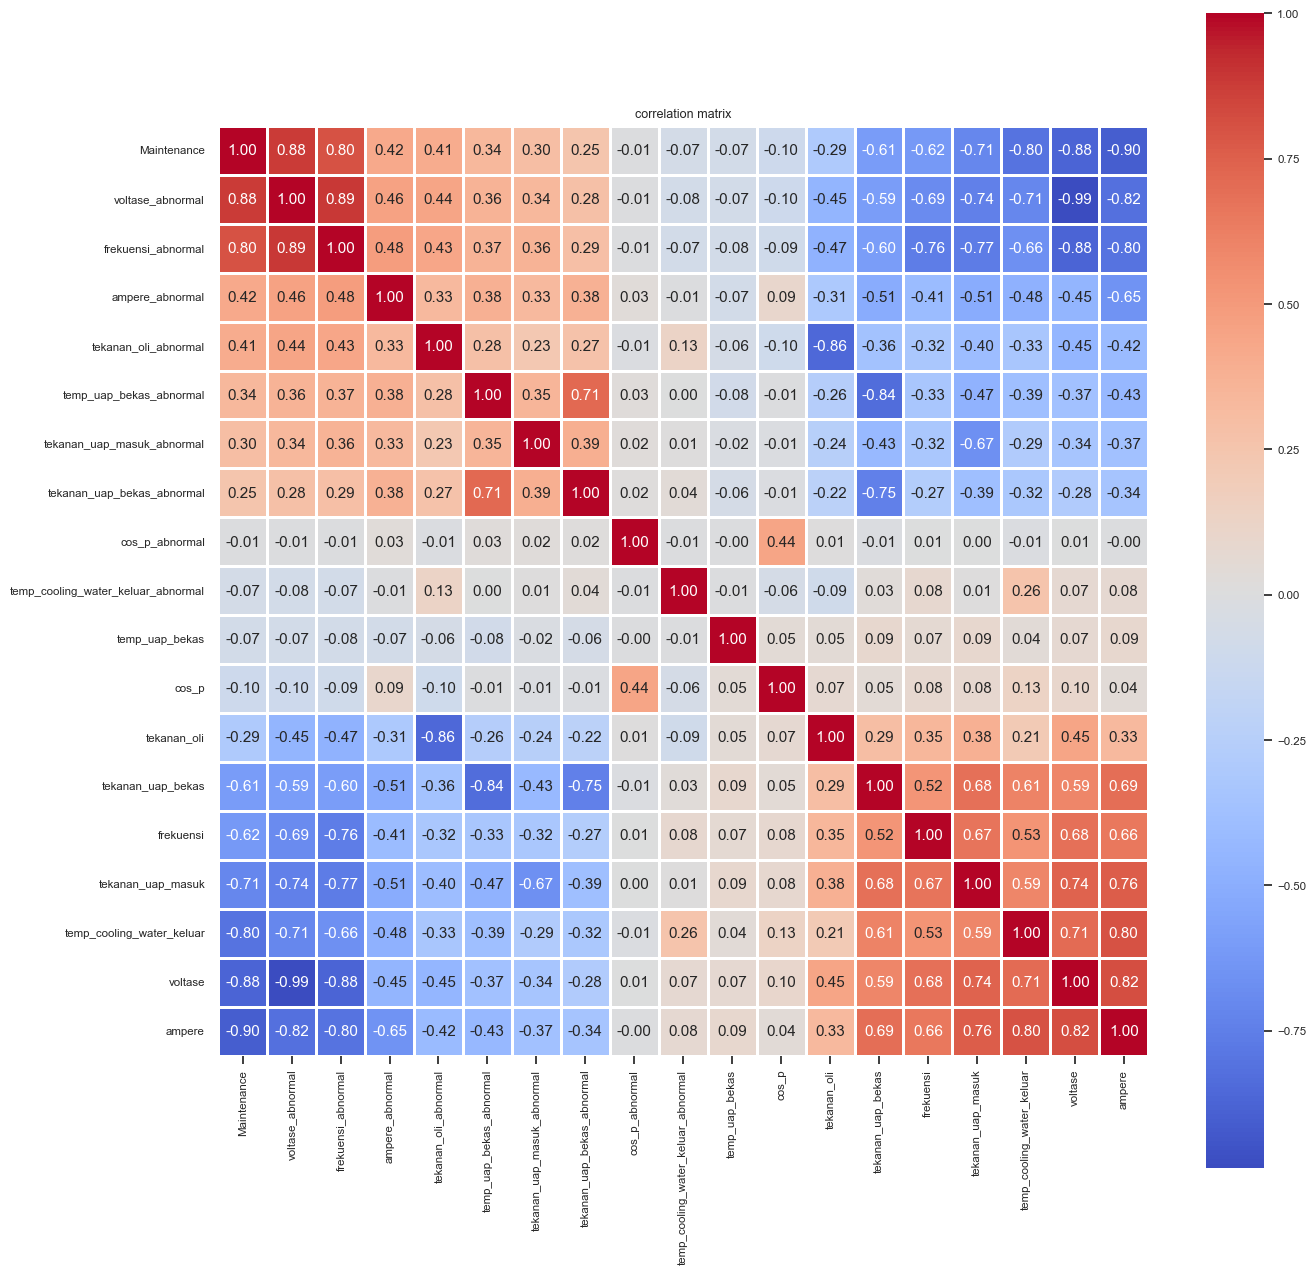

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix, limited to highly correlated features
vis_corr = df[df_corrP.index]

idx = vis_corr.corr().sort_values("Maintenance", ascending=False).index
vis_corr_sorted = vis_corr.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

plt.figure(figsize = (15,15))
sns.set(font_scale=0.75)
ax = sns.heatmap(vis_corr_sorted.corr().round(3), 
            annot=True, 
            square=True, 
            linewidths=.75, cmap="coolwarm", 
            fmt = ".2f", 
            annot_kws = {"size": 11})
ax.xaxis.tick_bottom()
plt.title("correlation matrix")
plt.show()

In [141]:
from sklearn.cluster import KMeans

sc = []
n = []
for i in range(2,30):

    cls = KMeans(n_clusters=i,random_state=42).fit(df[df.columns[12:-1]])
    n.append(i)
    sc.append(silhouette_score(df[df.columns[12:-1]], cls.labels_))
#     df['Cluster_Maintenance'] = cls.labels_

In [142]:
pd.DataFrame({"k":n, "Silhouette_Score":sc})

,k,Silhouette_Score
0,2,0.405000
1,3,0.428705
2,4,0.451203
3,5,0.495911
4,6,0.532046
5,7,0.558868
6,8,0.566681
7,9,0.602043
8,10,0.642295
9,11,0.665301


In [137]:
pd.DataFrame({"k":n, "Silhouette_Score":sc})

,k,Silhouette_Score
0,2,0.902871
1,3,0.844760
2,4,0.847854
3,5,0.829406
4,6,0.803014
5,7,0.846903
6,8,0.857957
7,9,0.860726
8,10,0.873124
9,11,0.876217


In [146]:
cls = KMeans(n_clusters=2,random_state=42).fit(df[df.columns[3:12]])
df['Cluster_Maintenance'] = cls.labels_
df

,tanggal,jam,timestamps,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,...,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance,Cluster_Maintenance
0,1/4/2023,7:30,2023-01-04 07:30:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
1,1/4/2023,8:00,2023-01-04 08:00:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
2,1/4/2023,8:30,2023-01-04 08:30:00,19,3.0,135,3.3,48,380,800,...,0,0,0,0,0,0,0,0,0,0
3,1/4/2023,9:00,2023-01-04 09:00:00,16,2.0,130,3.3,38,380,400,...,1,1,0,0,0,1,0,1,0,1
4,1/4/2023,9:30,2023-01-04 09:30:00,19,1.8,130,3.3,40,380,400,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,4/30/2023,5:00,2023-04-30 05:00:00,11,1.2,125,3.2,30,350,400,...,1,1,1,0,1,1,0,1,1,1
5622,4/30/2023,5:30,2023-04-30 05:30:00,18,1.4,125,3.2,30,350,400,...,1,1,1,0,1,1,0,0,1,1
5623,4/30/2023,6:00,2023-04-30 06:00:00,10,5.0,125,3.2,30,350,400,...,1,1,1,0,1,1,0,0,1,1
5624,4/30/2023,6:30,2023-04-30 06:30:00,10,1.2,125,3.2,30,350,400,...,1,1,1,0,1,1,0,1,1,1


In [147]:
df.to_excel("hasil_cluster_v2.xlsx", index=False)